In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn import model_selection

In [6]:
# defining column names
names=['x', 'y', 'class']

# loading training data
df=pd.read_csv('/Users/jayraj/Applied_AI_Course/Applied_ai_course/Datasets/demo_data_KNN/2.concerticcir1.csv', header=None, names=names)
df.head(10)

,x,y,class
0,-0.382891,-0.090840,1.0
1,-0.020962,-0.477874,1.0
2,-0.396116,-1.289427,0.0
3,-0.618130,-0.063837,1.0
4,0.703478,-0.187038,1.0
5,-0.459705,0.694775,0.0
6,-0.450917,-0.715705,0.0
7,-0.455620,-0.134060,1.0
8,-0.265139,0.408129,1.0
9,-0.154746,0.414070,1.0


## Simple cross validation

In [21]:
# create a design matrix X and target vector y
X=np.array(df.iloc[:,:2])
y=np.array(df['class'])

In [26]:
# split the data into train and test data
X_1, X_test, y_1, y_test=model_selection.train_test_split(X,y,test_size=0.3,random_state=0)

In [27]:
# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = model_selection.train_test_split(X_1,y_1, test_size=0.3)

In [28]:
for i in range(1,30,2):
    # instantiate learning model (k=30)
    knn=KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(X_tr,y_tr)

    # predict the response on the crossvalidation train
    pred=knn.predict(X_cv)

    # evaluate cv accuracy
    acc=accuracy_score(y_cv, pred, normalize=True)*float(100)
    print('\nCV accuracy for k = %d is %d%%' %(i, acc))

knn=KNeighborsClassifier(1)
knn.fit(X_tr, y_tr)
pred=knn.predict(X_test)
acc=accuracy_score(y_test, pred, normalize=True)*float(100)
print('\n***Test accuracy for k=1 is %d%%' %(acc))



CV accuracy for k = 1 is 85%

CV accuracy for k = 3 is 76%

CV accuracy for k = 5 is 52%

CV accuracy for k = 7 is 42%

CV accuracy for k = 9 is 38%

CV accuracy for k = 11 is 33%

CV accuracy for k = 13 is 28%

CV accuracy for k = 15 is 28%

CV accuracy for k = 17 is 28%

CV accuracy for k = 19 is 33%

CV accuracy for k = 21 is 33%

CV accuracy for k = 23 is 33%

CV accuracy for k = 25 is 33%

CV accuracy for k = 27 is 33%

CV accuracy for k = 29 is 33%

***Test accuracy for k=1 is 76%


## 10 fold cross validation

/Users/jayraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jayraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/jayraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/Users/jayraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/jayraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/jayraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/


The optimal number of neighbors is 1.


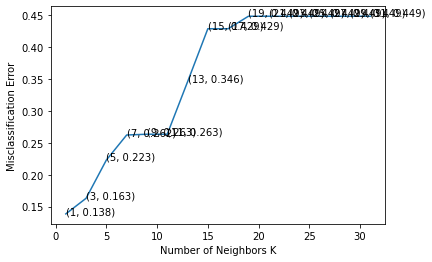

the misclassification error for each k value is :  [0.138 0.163 0.223 0.262 0.263 0.263 0.346 0.429 0.429 0.449 0.449 0.449
 0.449 0.449 0.449 0.449   nan   nan   nan   nan   nan   nan   nan   nan
   nan]


In [32]:
# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_tr, y_tr, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [33]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_tr, y_tr)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 1 is 76.666667%
